In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime, timezone


In [2]:
url="http://192.168.35.69/conex2tplink.txt"
df = pd.read_csv(url, sep='\t')
df = df.dropna()
df['momento'] = (pd.to_datetime(df['timestamp'], unit='s')- pd.Timedelta('04:30:00')).apply(lambda x: x.strftime("%d/%m/%Y %H:%M"))
df['momento'] = pd.to_datetime(df['momento'], format="%d/%m/%Y %H:%M")
print(df.shape)
df.tail()

(14919, 5)


,timestamp,N_conx,b_reci,b_env,momento
14916,1.613137e+09,18,1081779345,2179169675,2021-02-12 09:09:00
14917,1.613137e+09,19,1081925159,2179719425,2021-02-12 09:10:00
14918,1.613137e+09,20,1082116881,2180929511,2021-02-12 09:11:00
14919,1.613137e+09,20,1082221304,2181203051,2021-02-12 09:12:00
14920,1.613137e+09,20,1082327042,2181622987,2021-02-12 09:13:00


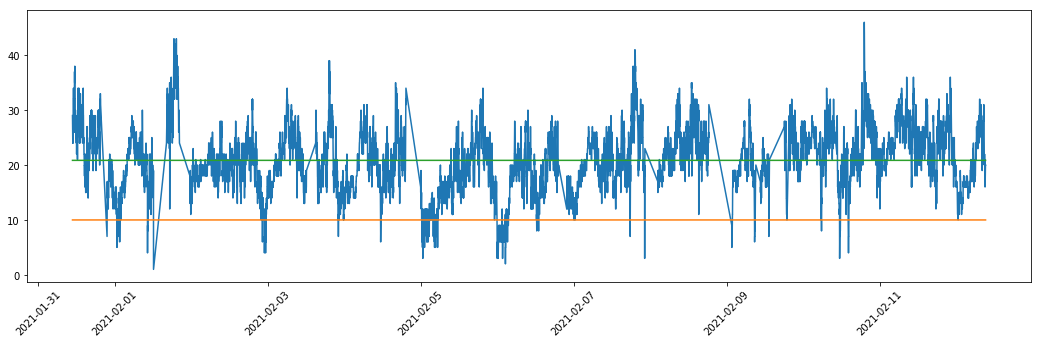

In [3]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

from matplotlib import rcParams
import matplotlib.ticker as ticker
rcParams['figure.figsize'] = 18, 5
X = list(df.momento.values)
Y = list(df.N_conx.values)
Z = [10]*len(Y)
Z1 = [df.N_conx.mean()]*len(Y)

#ax = plt.axes()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(len(X)//8))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(len(X)//4))

plt.plot(X, Y)
plt.plot(X,Z)
plt.plot(X,Z1)
#plt.gcf().autofmt_xdate()
plt.xticks(rotation= 45)
plt.show()



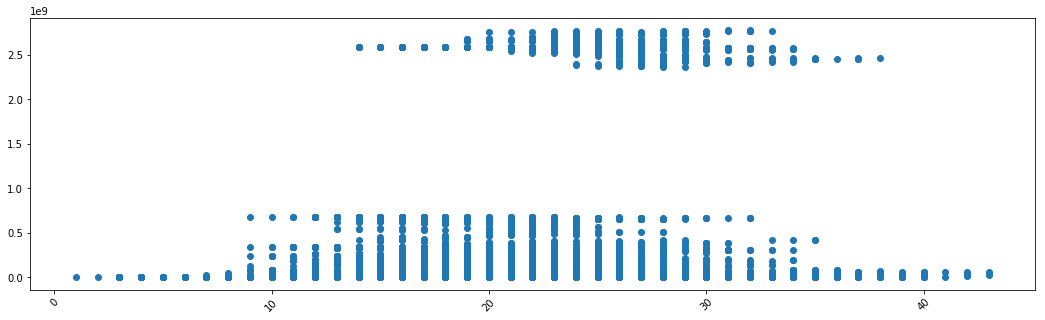

In [4]:
X = list(df.N_conx.values)
Y = list(df.b_reci.values)
#Z = list(df.b_env.values)
#Z1 = [df.N_conx.mean()]*len(Y)

#ax = plt.axes()
#ax.xaxis.set_major_locator(ticker.MultipleLocator(len(X)//8))
#ax.xaxis.set_minor_locator(ticker.MultipleLocator(len(X)//4))

plt.scatter(X, Y)
#plt.plot(X,Z)
#plt.yscale('log')

#plt.plot(X,Z1)
#plt.gcf().autofmt_xdate()
plt.xticks(rotation= 45)
plt.show()